[[ 1.07296684 -0.73329471]
 [-1.06599597  1.18975673]
 [-0.9509693  -0.73347403]
 [ 0.77096052  0.69747751]
 [-1.0997695   1.10854304]
 [-1.12326686 -1.04942819]
 [ 0.90553272  1.19237309]
 [-1.45269982  1.09702815]
 [ 0.7661435  -0.97018801]
 [-1.06904294  1.14026854]
 [-1.50877237  1.06184392]
 [ 1.32647193  1.52694089]
 [ 1.18757058 -1.01661457]
 [ 0.70298396 -0.82688887]
 [ 1.11672156 -0.87140413]
 [-1.30638284 -0.8389645 ]
 [ 0.69972665  0.79291546]
 [-0.86103859 -0.39139971]
 [-0.05324691 -0.93166732]
 [ 0.94152724  1.15316905]]
[2 3 1 0 3 1 0 3 2 3 3 0 2 2 2 1 0 1 1 0]
[[ 1.07296684 -0.73329471]
 [-1.06599597  1.18975673]
 [-0.9509693  -0.73347403]
 [ 0.77096052  0.69747751]
 [-1.0997695   1.10854304]
 [-1.12326686 -1.04942819]
 [ 0.90553272  1.19237309]
 [-1.45269982  1.09702815]
 [ 0.7661435  -0.97018801]
 [-1.06904294  1.14026854]
 [-1.50877237  1.06184392]
 [ 1.32647193  1.52694089]
 [ 1.18757058 -1.01661457]
 [ 0.70298396 -0.82688887]
 [ 1.11672156 -0.87140413]
 [-1.3063828

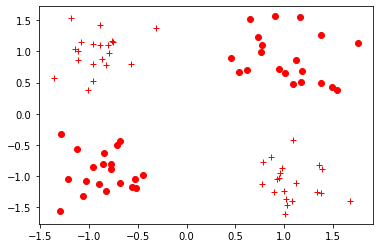

tensor([[ 1.0730, -0.7333],
        [-1.0660,  1.1898],
        [-0.9510, -0.7335],
        [ 0.7710,  0.6975],
        [-1.0998,  1.1085],
        [-1.1233, -1.0494],
        [ 0.9055,  1.1924],
        [-1.4527,  1.0970],
        [ 0.7661, -0.9702],
        [-1.0690,  1.1403],
        [-1.5088,  1.0618],
        [ 1.3265,  1.5269],
        [ 1.1876, -1.0166],
        [ 0.7030, -0.8269],
        [ 1.1167, -0.8714],
        [-1.3064, -0.8390],
        [ 0.6997,  0.7929],
        [-0.8610, -0.3914],
        [-0.0532, -0.9317],
        [ 0.9415,  1.1532]])
tensor([1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
        0., 0.])
Before Training, test loss is 0.7079223990440369
tensor([[ 1.0730, -0.7333],
        [-1.0660,  1.1898],
        [-0.9510, -0.7335],
        [ 0.7710,  0.6975],
        [-1.0998,  1.1085],
        [-1.1233, -1.0494],
        [ 0.9055,  1.1924],
        [-1.4527,  1.0970],
        [ 0.7661, -0.9702],
        [-1.0690,  1.1403],
        [-1.5

In [39]:
# 좌표의 정답을 찾는 인공신경망

import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_dim = 2     #디멘션 2차원
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim,           # 학습에 쓰이는 데이터 x_train, 레이블 y_train 즉 y_train에는 x_train의 데이터가 레이블이 0과 1어디인지 적어놓은 데이터다
                              centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                              shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim,             # 위와 마찬가지로 레이블 즉 답지를 적어 놓은 데이터를 말함.
                            centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                            shuffle=True, cluster_std=0.3)


def label_map(y_, from_, to_):                                          # 
  y = numpy.copy(y_)
  for f in from_:
    y[y_ == f] = to_
  return y

print(x_test)
print(y_test)

y_train = label_map(y_train, [0,1], 0)      # y_train의 레이블 된 데이터들을 0, 1은 무조건 0으로 2, 3은 1로 다시 y_train 지정
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

print(x_test)
print(y_test)


def vis_data(x,y = None, c = 'r'):          # 그래프로 보여주려고 하는 함수
  if y is None:
    y = [None] * len(x)
  for x_, y_ in zip(x,y):
    if y_ is None:
      plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
    else:
      plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

x_train = torch.FloatTensor(x_train)        # numpy를 pytorch로 바꿈
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

print(x_test)
print(y_test)



class NeuralNet(torch.nn.Module):               # 학습모델 생성(신경망모델) (input_size 데이터의 차원)
  def __init__(self, input_size, hidden_size):
    super(NeuralNet, self).__init__()           # 생성자
    self.input_size = input_size
    self.hidden_size = hidden_size

    self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)      # 들어오는 데이터에 선형 변환을 적용(input_size를 입력받아서 hidden_size만큼의 중간층 노드를 만듬) y=Ax+b를 변환한다. 정의
    self.relu = torch.nn.ReLU()                                                 # 활성화 함수 입력값이 0보다 크면 그대로 출력 0이하면 0 정의
    self.linear_2 = torch.nn.Linear(self.hidden_size, 1)                    # 
    self.sigmoid = torch.nn.Sigmoid()                                        # 일정 값을 기준으로 0인지 1인지구분함으로써 분류하는 방식(0과 1사이의 값을 반환하는 활성화 함수)

  def forward(self, input_tensor):              # 순전파
    linear1 = self.linear_1(input_tensor)
    relu = self.relu(linear1)
    linear2 = self.linear_2(relu)
    output = self.sigmoid(linear2)
    return output

model = NeuralNet(2,5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

model.eval()  #평가모드
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

print(x_test.squeeze())

print('벡터 [-1,1]이 레이블 1을 가질 확률은 {}'.format(model(torch.FloatTensor([-1,1])).item()))

for epoch in range(epochs):
  model.train()  #학습모드
  optimizer.zero_grad()                                 # 경사값 0으로 설정
  train_output = model(x_train)                         # 훈련데이터 입력
  train_loss = criterion(train_output.squeeze(), y_train) # 손실 계산
  if epoch % 100 == 0:                                  # 100번마다 오차 주는지 
    print('Train loss at {} is {}'.format(epoch, train_loss.item()))
  train_loss.backward()                                 # 오차함수를 가중치로 미분하여 오차가 최소가 되는 방향을 구하고       [역전파를 행하는 코드]
  optimizer.step()                                      # 그 방향으로 모델을 학습률만큼 이동시킴

model.eval()
test_loss = criterion(model(x_test).squeeze(), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

new_model = NeuralNet(2,5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1,1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))